# Week4授業前課題2 住宅価格を回帰分析しよう

1.この課題の目的
教師あり学習（回帰問題）の概観を知る
scikit-laernを使い回帰を行えるようにする
手法の簡単な比較をする

2.住宅価格の回帰
Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。

79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。
こういった連続値のものを推測する問題を回帰問題と呼びます。

House Prices: Advanced Regression Techniques

今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。
ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。

線形回帰
SVM
決定木
ランダムフォレスト
分類問題と回帰問題の両方で使える手法と、そうではない手法が存在します。

3.データセットの準備
Week3同様にKaggleからデータセットをダウンロードしてください。train.csvのみを使用します。

House Prices: Advanced Regression Techniques | Kaggle

4.回帰問題の流れ
回帰問題の流れは分類問題と基本的には同じですから、課題1のように細かい説明はしません。

練習のための準備
このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったように様々なタイプのデータ含まれています。
これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、
GrLivAreaとYearBuiltの2つだけを利用することにします。

## 【課題1】練習のために特徴量の選択

データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [1]:
import pandas as pd
df_train_default = pd.read_csv("train.csv")

In [2]:
df_train_default .head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train = df_train_default[['GrLivArea', 'YearBuilt', 'SalePrice']]

# 説明変数を定義
dfX = df_train[['GrLivArea', 'YearBuilt']]

# 目的変数を定義
dfy = df_train[['SalePrice']]

## 【課題2】回帰問題のパイプライン

データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れ（パイプライン）を作成・実行してください。
sklearn.linear_model.LinearRegression — scikit-learn 0.20.2 documentation
評価のための指標値は分類問題と異なり、平均二乗誤差（Mean Squared Error, MSE）を使うことが一般的です。
sklearn.metrics.mean_squared_error — scikit-learn 0.20.2 documentation
可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

### ■簡単に分析

In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df_train.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


/Users/Nonna/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


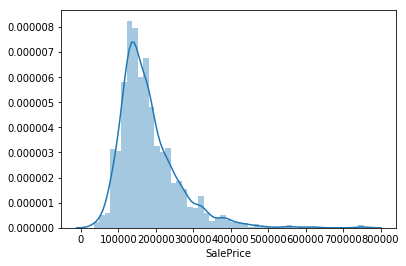

In [6]:
## 目的変数の分布
sns.distplot(df_train['SalePrice'])
plt.show()

/Users/Nonna/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


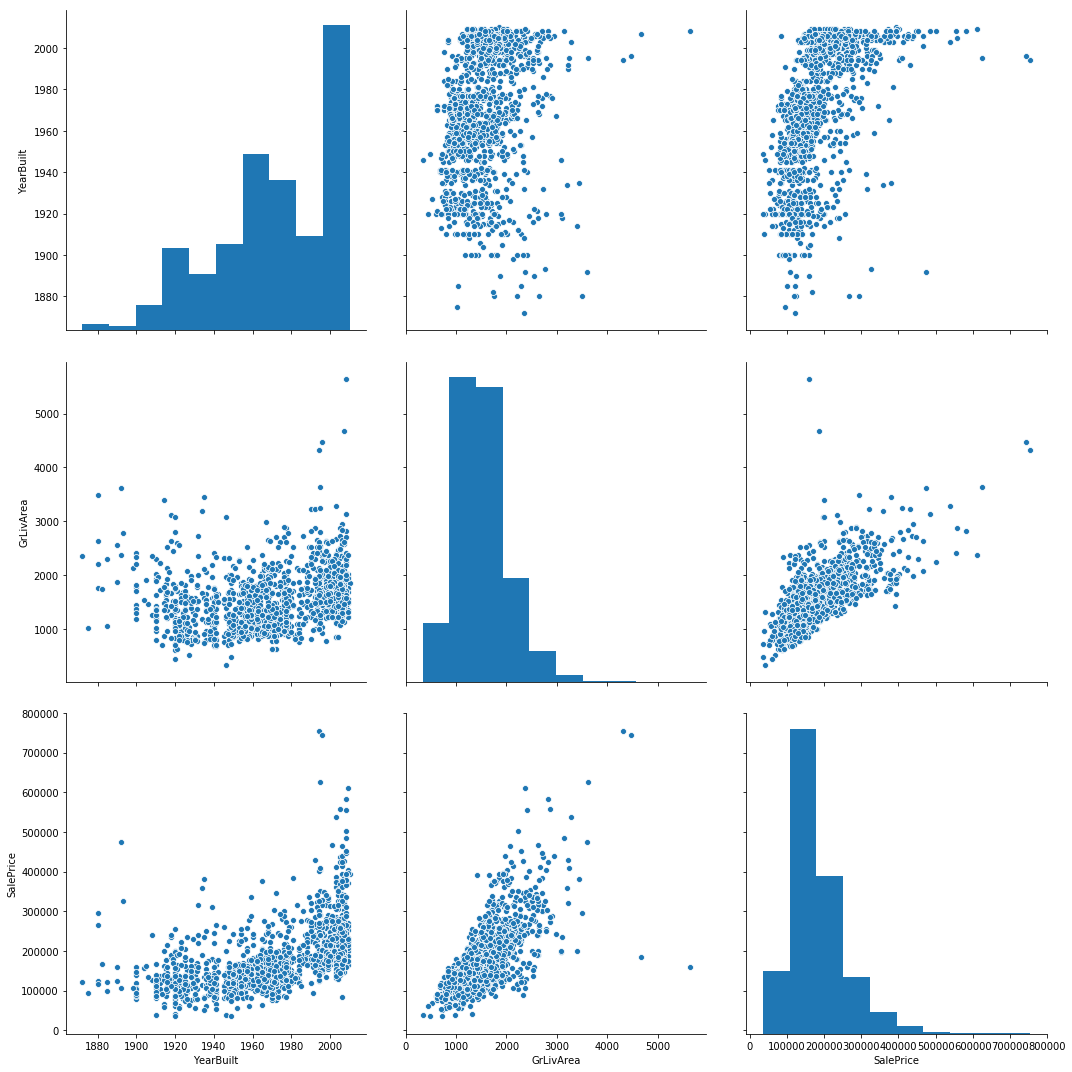

In [7]:
cols_viz = [ "YearBuilt", "GrLivArea", "SalePrice"]
sns.pairplot(df_train[cols_viz], size=5)
plt.tight_layout()
plt.show()

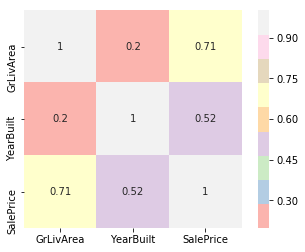

In [8]:
#相関関数行列をヒートマップで表示
df_corr = df_train.corr()
sns.heatmap(df_corr, square=True, annot=True, cmap='Pastel1') # annot=True:格子の中に値を表示

### ■前処理

In [9]:
#　欠損値の数を確認する。
print(df_train.isnull().sum())

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64


In [72]:
# testデータ、trainデータを分ける
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.3, random_state=100 )

In [73]:
# Dataの型を揃える
print(type(X_train), type(X_test), type(y_train), type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [74]:
# 全部Pandasだったので、今後混乱しないようにarrayのも作っておく
arX_train = X_train.values
arX_test = X_test.values
ary_train = y_train.values
ary_test = y_test.values

In [75]:
print(type(arX_train), type(arX_test), type(ary_train), type(ary_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [76]:
# トレーニングデータを使用してデータの標準偏差と平均値を求める
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

#トレーニングデータと、テストデータをそれぞれ標準化する
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# 目的変数の対数をとる
y_train_log = np.log(y_train)
y_test_log =np.log(y_test)

/Users/Nonna/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Nonna/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys
/Users/Nonna/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


### ■線形回帰 による学習、推定

In [77]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train_std, y_train_log)
y_pred = np.exp(model_lr.predict(X_test_std))

In [78]:
print(model_lr.coef_)  #回帰変数の表示
print(model_lr.intercept_)  #回帰直線の切片

[[0.23389959 0.19097947]]
[12.02266098]


### ■評価

In [79]:
#平均二乗誤差（Mean Squared Error, MSE）で評価
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

1991413624.9271102

### ■可視化

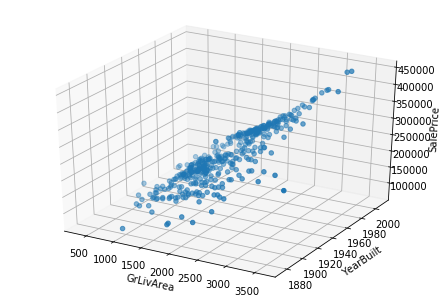

In [80]:
# 3次元で可視化

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("GrLivArea" )
ax.set_ylabel("YearBuilt")
ax.set_zlabel("SalePrice")

x1 = X_test.loc[:, "GrLivArea"]
x2 = X_test.loc[:, "YearBuilt"]

ax.scatter3D(x1, x2, y_pred)
plt.show()

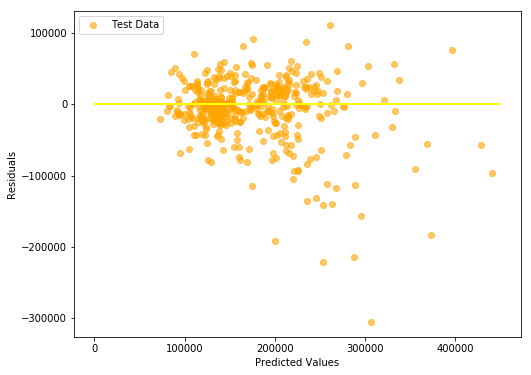

In [81]:
#誤差のグラフ化
plt.figure(figsize=(8,6))
plt.scatter(y_pred, y_pred - y_test, c = 'orange', marker = 'o', label = 'Test Data', alpha=0.6)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# 凡例を左上に表示
plt.legend(loc = 'upper left')

# y = 0に直線を引く
plt.hlines(y = 0, xmin = 0, xmax = 450000, lw = 2, color = 'yellow')

plt.show()

## 【課題3】手法の比較

以下の全ての手法について学習・推定・評価・可視化を行ってください。
そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。
どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

線形回帰
SVM
決定木
ランダムフォレスト
公式ドキュメントへのリンクは以下です。本来はそれぞれパラメータをチューニングするべきですが、まずはデフォルトで実行しましょう。

sklearn.linear_model.LinearRegression — scikit-learn 0.20.2 documentation
sklearn.svm.SVR — scikit-learn 0.20.2 documentation
sklearn.tree.DecisionTreeRegressor — scikit-learn 0.20.2 documentation
sklearn.ensemble.RandomForestRegressor — scikit-learn 0.20.2 documentation
SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。

### ■線形回帰

In [82]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train_std, y_train_log)
y_pred_lr = np.exp(model_lr.predict(X_test_std))

In [83]:
#平均二乗誤差（Mean Squared Error, MSE）で評価
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test,y_pred_lr)
mse_lr

1991413624.9271102

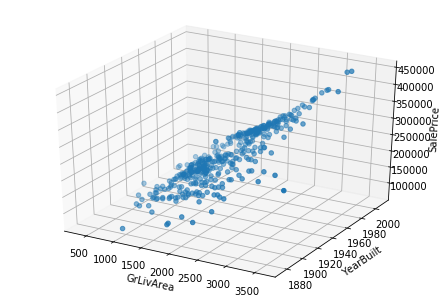

In [84]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("GrLivArea" )
ax.set_ylabel("YearBuilt")
ax.set_zlabel("SalePrice")

x1 = X_test.loc[:, "GrLivArea"]
x2 = X_test.loc[:, "YearBuilt"]

ax.scatter3D(x1, x2, y_pred_lr)
plt.show()

### ■SVM

In [102]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(X_train_std, y_train_log) 
y_pred_svr = np.exp(model_svr.predict(X_test_std))

/Users/Nonna/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [103]:
mse_svr = mean_squared_error(y_test,y_pred_svr)
mse_svr

1701947888.416544

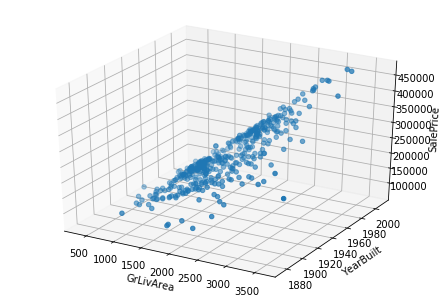

In [106]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("GrLivArea" )
ax.set_ylabel("YearBuilt")
ax.set_zlabel("SalePrice")

x1 = X_test.loc[:, "GrLivArea"]
x2 = X_test.loc[:, "YearBuilt"]

ax.scatter3D(x1, x2, y_pred_svr)
plt.show()

### ■決定木

In [108]:
from sklearn.tree import DecisionTreeRegressor 
model_dtr = DecisionTreeRegressor()
model_dtr.fit(X_train_std, y_train_log)
y_pred_dtr = np.exp(model_dtr.predict(X_test_std))

In [116]:
mse_dtr = mean_squared_error(y_test,y_pred_dtr)

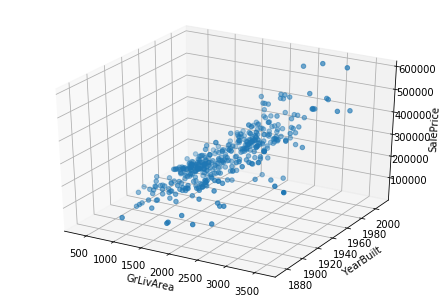

In [110]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("GrLivArea" )
ax.set_ylabel("YearBuilt")
ax.set_zlabel("SalePrice")

x1 = X_test.loc[:, "GrLivArea"]
x2 = X_test.loc[:, "YearBuilt"]

ax.scatter3D(x1, x2, y_pred_dtr)
plt.show()

### ■ランダムフォレスト

In [111]:
from sklearn.ensemble import RandomForestRegressor 
model_rfr = RandomForestRegressor ()
model_rfr.fit(X_train_std, y_train_log)
y_pred_rfr = np.exp(model_rfr.predict(X_test_std))

/Users/Nonna/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Nonna/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [115]:
mse_rfr = mean_squared_error(y_test,y_pred_rfr)

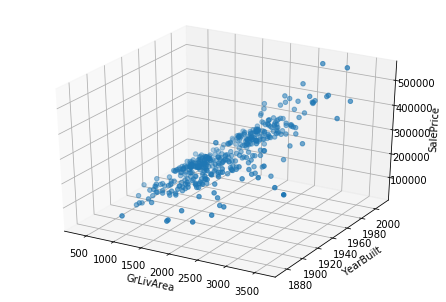

In [113]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("GrLivArea" )
ax.set_ylabel("YearBuilt")
ax.set_zlabel("SalePrice")

x1 = X_test.loc[:, "GrLivArea"]
x2 = X_test.loc[:, "YearBuilt"]

ax.scatter3D(x1, x2, y_pred_rfr)
plt.show()

In [117]:
pd.DataFrame([mse_lr,mse_svr,mse_dtr,mse_rfr], columns=["MSE"], index=["LinearRegression","SVM","DecisionTree","RandomForest"])

,MSE
LinearRegression,1.991414e+09
SVM,1.701948e+09
DecisionTree,2.551806e+09
RandomForest,1.804213e+09


### ■簡単な考察

In [ ]:
・正解ラベルと予測値の誤差が最も小さかったのはSVMだった
・線形回帰はとても単純なモデルで、SVMはマージン最大化などの手法で汎化性能が高められているモデルなので
 SVMの方が精度が良くなったのは想定通り
・決定木を複数集めたものがランダムフォレストなので、ランダムフォレストの方が精度が良くなったのは想定通り

## 【問題4】（アドバンス課題）各パラメータの意味

手法のパラメータはデフォルトとしましたが、実際に利用する上ではデフォルトは必ずしも良い設定ではありません。
それぞれの意味を調査した上で複数の設定を試し、その結果を報告してください。

## 【問題5】（アドバンス課題）他の特徴量も使用しての学習

In [ ]:
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。
どう選択・加工するかにはデータ分析が重要になってきます。

Kaggleのカーネルも参考にできます。

House Prices: Advanced Regression Techniques | Kaggle